In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics


In [30]:
df = pd.read_csv("../../data/Salary_Data.csv")
print(df.head())




    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [31]:
print("\n🔍 Missing Values Before Cleaning:")
print(df.isnull().sum())


🔍 Missing Values Before Cleaning:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [32]:
df = df.dropna()   
print("\n✅ Missing Values After Cleaning:")
print(df.isnull().sum())




✅ Missing Values After Cleaning:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:

possible_years = ['Years of Experience', 'YearsExperience', 'Experience']
possible_age = ['Age']
possible_gender = ['Gender', 'Sex']
possible_edu = ['Education Level', 'Education', 'EducationLevel']
possible_job = ['Job Title', 'JobTitle', 'Position']

def find_first(cols):
    for c in cols:
        if c in df.columns:
            return c
    return None

year_col = find_first(possible_years)
age_col = find_first(possible_age)
gender_col = find_first(possible_gender)
edu_col = find_first(possible_edu)
job_col = find_first(possible_job)

if not year_col:
    raise KeyError("No years-of-experience column found. Expected one of: " + ", ".join(possible_years))

selected = [c for c in [year_col, age_col, gender_col, edu_col, job_col] if c is not None]
print("Using features:", selected)

X = df[selected].copy()
y = df['Salary']

# One-hot encode categorical features among the selected columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# ...existing code...

Using features: ['Years of Experience', 'Age', 'Gender', 'Education Level', 'Job Title']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).ravel()



In [36]:
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train_scaled)
#test

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [37]:

y_pred_scaled = model.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

y_actual = sc_y.inverse_transform(y_test_scaled.reshape(-1, 1))




In [38]:
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("\n📊 Model Evaluation Metrics:")
print(f"R² Score       : {r2:.4f}")
print(f"Mean Abs Error : {mae:.2f}")
print(f"Root MSE       : {rmse:.2f}")



📊 Model Evaluation Metrics:
R² Score       : 0.8928
Mean Abs Error : 10399.26
Root MSE       : 17486.30


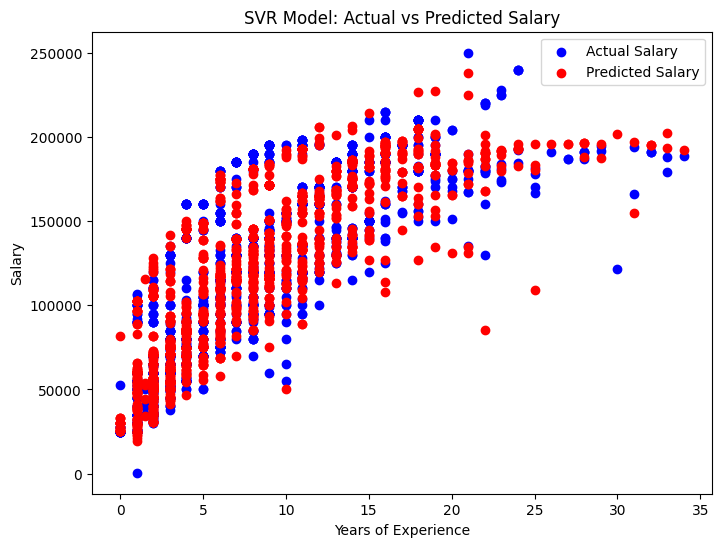

In [ ]:

if 'Years of Experience' in X_test.columns:
    x_col = 'Years of Experience'
elif 'YearsExperience' in X_test.columns:
    x_col = 'YearsExperience'
else:
    
    numeric_cols = X_test.select_dtypes(include=[np.number]).columns
    x_col = numeric_cols[0]

x_vals = X_test[x_col].values
y_actual_flat = y_actual.ravel()
y_pred_flat = y_pred.ravel()

plt.figure(figsize=(8,6))
plt.scatter(x_vals, y_actual_flat, color='blue', label='Actual Salary')
plt.scatter(x_vals, y_pred_flat, color='red', label='Predicted Salary')
plt.title("SVR Model: Actual vs Predicted Salary")
plt.xlabel(x_col)
plt.ylabel("Salary")
plt.legend()
plt.show()


In [ ]:

sample_vals = {year_col: [5, 10, 12]}
if age_col:
    sample_vals[age_col] = [30, 40, 28]
if gender_col:
    sample_vals[gender_col] = ['Male', 'Female', 'Male']
if edu_col:
    sample_vals[edu_col] = ["Bachelor's", "Master's", "High School"]
if job_col:
    sample_vals[job_col] = ['Data Scientist', 'Software Engineer', 'Analyst']

new_raw = pd.DataFrame(sample_vals)

# One-hot encode the categorical columns 
cat_cols_new = [c for c in [gender_col, edu_col, job_col] if c is not None and c in new_raw.columns]
if cat_cols_new:
    new_encoded = pd.get_dummies(new_raw, columns=cat_cols_new, drop_first=True)
else:
    new_encoded = new_raw.copy()

new_data = new_encoded.reindex(columns=X_train.columns, fill_value=0).astype(float)

new_data_scaled = sc_X.transform(new_data)
predicted_salary = sc_y.inverse_transform(model.predict(new_data_scaled).reshape(-1, 1)).flatten()

result_df = new_raw.copy()
result_df['Predicted Salary (LKR)'] = predicted_salary.round(2)
print(result_df.to_string(index=False))


 Years of Experience  Age Gender Education Level         Job Title  Predicted Salary (LKR)
                   5   30   Male      Bachelor's    Data Scientist               159899.36
                  10   40 Female        Master's Software Engineer               200822.88
                  12   28   Male     High School           Analyst               112424.01
